## Test model with Test dataset

In [13]:
import torch
import torchvision
import ultralytics
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import matplotlib.image as mpimg
import random
from glob import glob

### Load best trained Model



In [3]:
model= YOLO('Bestmodel4thrun.pt')  # Load the best trained model

In [4]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(f"Using device: {device}")

Using device: cuda


In [6]:
def leaf_detect(img_path,model):
     # Load the trained YOLOv11 model
    img = cv2.imread(img_path)
    detect_result = model(img)
    detect_img = detect_result[0].plot()
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)    
    return detect_img

In [7]:
def show_detections(images_dir, num_images=16, rows=4, columns=4):
    image_files = os.listdir(images_dir)
    selected_images = random.sample(image_files, num_images)
    fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(15, 15))
    for i, img_file in enumerate(selected_images):
        row_idx = i // columns
        col_idx = i % columns
        img_path = os.path.join(images_dir, img_file)
        detect_img = leaf_detect(img_path, model)
        axes[row_idx, col_idx].imshow(detect_img)
        axes[row_idx, col_idx].axis('off')
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    plt.show()


0: 640x640 4 leafs, 9.3ms
Speed: 4.3ms preprocess, 9.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 leafs, 9.6ms
Speed: 3.2ms preprocess, 9.6ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 leafs, 10.0ms
Speed: 2.8ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 leaf, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 leaf, 8.0ms
Speed: 2.1ms preprocess, 8.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 leafs, 11.9ms
Speed: 2.5ms preprocess, 11.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 leaf, 10.1ms
Speed: 3.9ms preprocess, 10.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 leaf, 9.3ms
Speed: 3.0ms preprocess, 9.3ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 

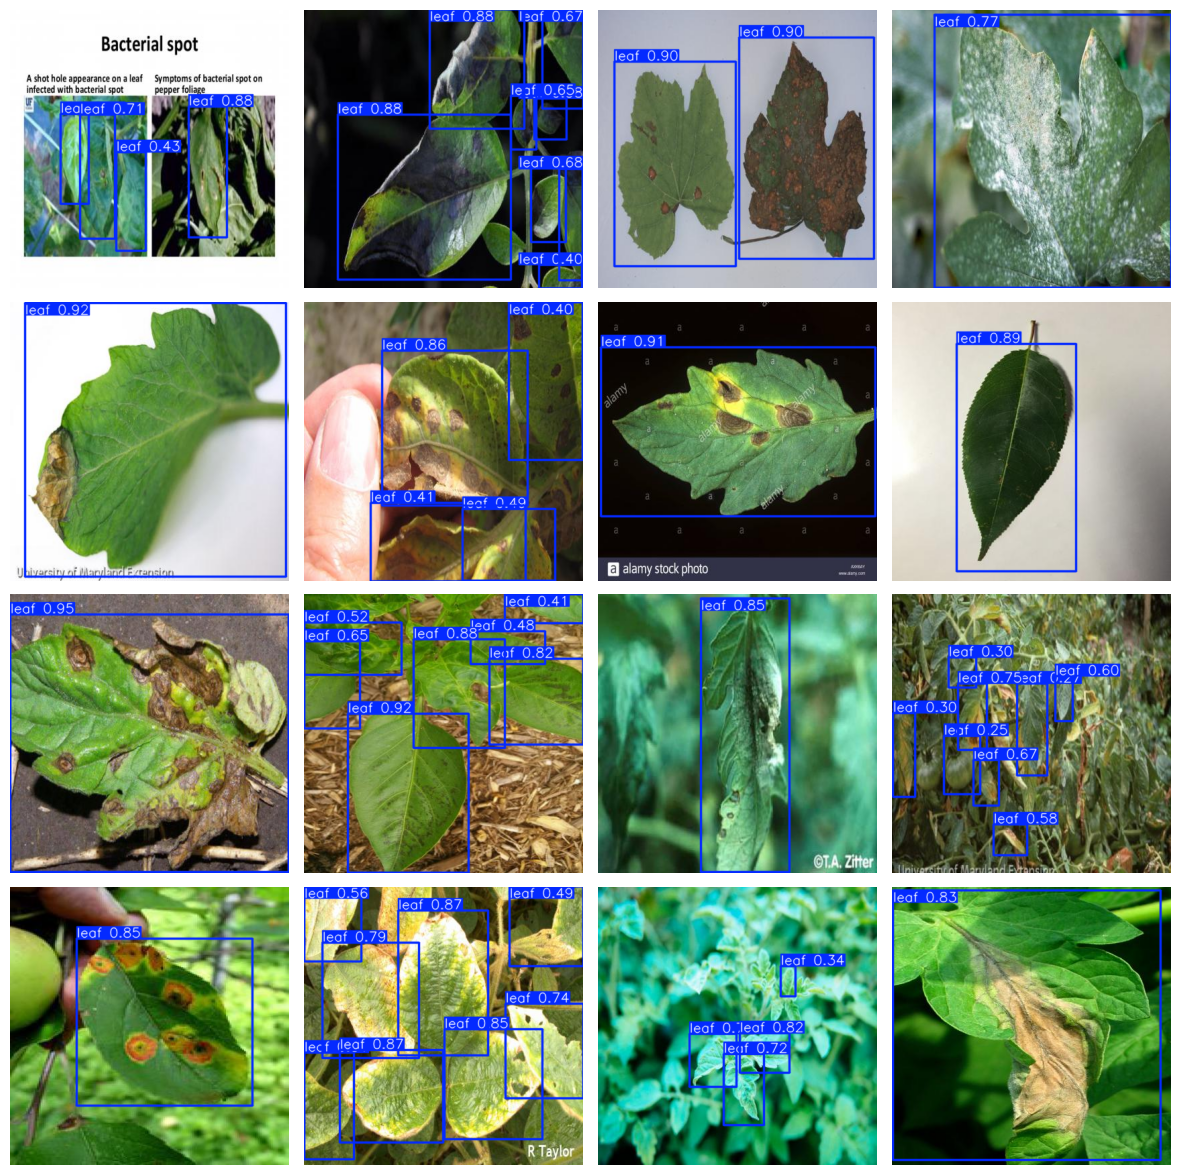

In [11]:
imgdir = 'data/test/images'  # Directory containing test images
show_detections(imgdir, num_images=16, rows=4, columns=4)

###  Make a video using test images

In [19]:


# Load trained model

# Path to folder with test images
image_folder = "data/test/images"
image_paths = sorted(glob(os.path.join(image_folder, "*.jpg")))  # or *.png

# Optional: Define video writer to save output
save_output = True
output_video = "yolo_output.mp4"
frame_width, frame_height = 640, 480
fps = 10

if save_output:
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_video, fourcc, fps, (frame_width, frame_height))

# Loop through all images
display_time = 0.5   # seconds per image
fps = 10
frames_to_repeat = int(display_time * fps)

for image_path in image_paths:
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (frame_width, frame_height))
    results = model.predict(source=img_resized, imgsz=640, conf=0.25, verbose=False)
    annotated = results[0].plot()

    for _ in range(frames_to_repeat):
        cv2.imshow("YOLOv8 Detection", annotated)
        if save_output:
            out.write(annotated)
    if cv2.waitKey(int(1000/fps)) & 0xFF == ord('q'):
        break


# Cleanup
cv2.destroyAllWindows()
if save_output:
    out.release()
